In [1]:
# Dependencies
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from pathlib import Path

/Users/mana/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# Data source 
The dataset can be found and dowloaded from the following link https://www.kaggle.com/datasets/jainaru/adult-income-
census-dataset/data

In [2]:
# Copy the file path to reading 
file = Path(r'Source/adult.csv')

In [3]:
# Reading the CSV file in to the Pandas DataFrame 
df = pd.read_csv(file)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
# # Identify the duplicate values 
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [7]:
# checking for duplicates 
duplicate = df.drop_duplicates(inplace=True)
print(duplicate)

None


In [8]:
# Drop all rows with missing information
df.replace("?", pd.NA, inplace=True)
df.dropna(inplace=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [62]:
# changing the categorical(income) into the binary 
df['income_binary'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1) 
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,income_binary
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K,0


In [63]:
df.shape

(30139, 16)


The dataframe has 30139 rows and 16 columns that represent the Adult Census Income dataset from 1994 US Census Database by Barry Becker. This resouce shows the relation between socio-economic factors and income levels.

In [ ]:
# find uniq values of education 
df["education"].unique()

In [17]:
# find uniq values of occupation
df["occupation"].unique()

array(['Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Transport-moving', 'Sales',
       'Craft-repair', 'Farming-fishing', 'Tech-support',
       'Protective-serv', 'Handlers-cleaners', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [18]:
# find uniq values of marital status
df["marital.status"].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [19]:
# find uniq values of education.num
df["education.num"].unique()

array([ 9,  4, 10,  6, 16, 15, 13, 14,  7, 11,  2,  3, 12,  8,  5,  1])

In [20]:
df["race"].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

In [21]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income_binary
count,30139.000000,3.013900e+04,30139.000000,30139.000000,30139.000000,30139.000000,30139.000000
mean,38.441720,1.897950e+05,10.122532,1092.841202,88.439928,40.934703,0.249046
std,13.131426,1.056586e+05,2.548738,7409.110596,404.445239,11.978753,0.432468
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176275e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.784170e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.376045e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [22]:
# Importing the libraries for data modeling 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPClassifier
from sklearn import tree

In [23]:
# identfing the numerical and categorical colums in dataset 

numeric_cols = df.select_dtypes(include=[np.number])
categorical_cols = df.select_dtypes(exclude=[np.number])

# print(numeric_cols)
print(categorical_cols)

      workclass     education      marital.status         occupation  \
1       Private       HS-grad             Widowed    Exec-managerial   
3       Private       7th-8th            Divorced  Machine-op-inspct   
4       Private  Some-college           Separated     Prof-specialty   
5       Private       HS-grad            Divorced      Other-service   
6       Private          10th           Separated       Adm-clerical   
...         ...           ...                 ...                ...   
32556   Private  Some-college       Never-married    Protective-serv   
32557   Private    Assoc-acdm  Married-civ-spouse       Tech-support   
32558   Private       HS-grad  Married-civ-spouse  Machine-op-inspct   
32559   Private       HS-grad             Widowed       Adm-clerical   
32560   Private       HS-grad       Never-married       Adm-clerical   

        relationship   race     sex native.country income  
1      Not-in-family  White  Female  United-States  <=50K  
3          Unma

In [25]:
# Identify numerical and categorical columns from the dataset 

numerical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week','income_binary']
categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

In [26]:
# Preprocessing for numerical data: impute missing values and scale the data 

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
numerical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [27]:
# Preprocessing for categorical data: impute missing values and encoding 

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])
categorical_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoder', OneHotEncoder(handle_unknown='ignore'))])

In [28]:
# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['age', 'fnlwgt', 'education.num',
                                  'capital.gain', 'capital.loss',
                                  'hours.per.week', 'income_binary']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['workclass', 'education', 'marital.status',
                                  'occupation', 'relationship', 'race', 'sex',
                                  'native.country'])])

In [64]:
# Split the data into training and test sets
X = df.drop('income', axis=1)
y = df['income']
X.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income_binary
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,0


In [30]:
# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

label_encoder

LabelEncoder()

In [32]:
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [33]:
# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week',
                                                   'income_binary']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native.country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [34]:
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education.num',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week',
                                                   'income_binary']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital.status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex',
                                                   'native.country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [65]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score

 
#Create an imbalanced dataset with 3 classes
X, y = make_classification(
    n_samples=1000,
    n_features=15,
    n_classes=3,
    n_clusters_per_class=1,
    weights=[0.1, 0.3, 0.6],  # Class imbalance
     random_state=42
 )

# Split the original dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply oversampling using RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Apply undersampling using RandomUnderSampler
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train, y_train)

# Fit KNN classifier on the original train set
knn_original = KNeighborsClassifier(n_neighbors=5)
knn_original.fit(X_train, y_train)

# Fit KNN classifier on the oversampled train set
knn_oversampled = KNeighborsClassifier(n_neighbors=5)
knn_oversampled.fit(X_train_oversampled, y_train_oversampled)

# Fit KNN classifier on the undersampled train set
knn_undersampled = KNeighborsClassifier(n_neighbors=5)
knn_undersampled.fit(X_train_undersampled, y_train_undersampled)

# Make predictions on train sets
y_train_pred_original = knn_original.predict(X_train)
y_train_pred_oversampled = knn_oversampled.predict(X_train_oversampled)
y_train_pred_undersampled = knn_undersampled.predict(X_train_undersampled)

# Make predictions on test sets
y_test_pred_original = knn_original.predict(X_test)
y_test_pred_oversampled = knn_oversampled.predict(X_test)
y_test_pred_undersampled = knn_undersampled.predict(X_test)

# Calculate and print accuracy for train sets
print("Accuracy on Original Train Set:", accuracy_score(y_train, y_train_pred_original))
print("Accuracy on Oversampled Train Set:", accuracy_score(y_train_oversampled, y_train_pred_oversampled))
print("Accuracy on Undersampled Train Set:", accuracy_score(y_train_undersampled, y_train_pred_undersampled))

# Calculate and print accuracy for test sets
print("\nAccuracy on Original Test Set:", accuracy_score(y_test, y_test_pred_original))
print("Accuracy on Oversampled Test Set:", accuracy_score(y_test, y_test_pred_oversampled))
print("Accuracy on Undersampled Test Set:", accuracy_score(y_test, y_test_pred_undersampled))


Accuracy on Original Train Set: 0.92
Accuracy on Oversampled Train Set: 0.9405017921146953
Accuracy on Undersampled Train Set: 0.8617886178861789

Accuracy on Original Test Set: 0.875
Accuracy on Oversampled Test Set: 0.825
Accuracy on Undersampled Test Set: 0.81


The oversampling technique suggests that the KNN model is overfitting, and this is due to the oversampling itself.

The undersampling technique suggests that the KNN model may be biasedma bit and this is due to the undersampling itself.

So, in this case, a possible solution could be to use oversampling and tune the hyperparameters of the KNN to see if the overfitting can be avoided

In [67]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create an imbalanced dataset with 3 classes
X, y = make_classification(
    n_samples=1000,
    n_features=15,
    n_classes=3,
    n_clusters_per_class=1,
    weights=[0.1, 0.3, 0.6], 
      # Class imbalance
    random_state=42
)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest classifier on the train set
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on train and test sets
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Calculate and print accuracy for the train set
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Accuracy on Train Set:", train_accuracy)

# Calculate and print accuracy for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy on Test Set:", test_accuracy)

Accuracy on Train Set: 1.0
Accuracy on Test Set: 0.93


In this case, since we used the Random Forest, we didn’t need to resample the dataset. Anyway, the results suggest a possible overfitting of the model. This may be due to the Random Forest features itself, so further investigations will require hyperparameters tuning.

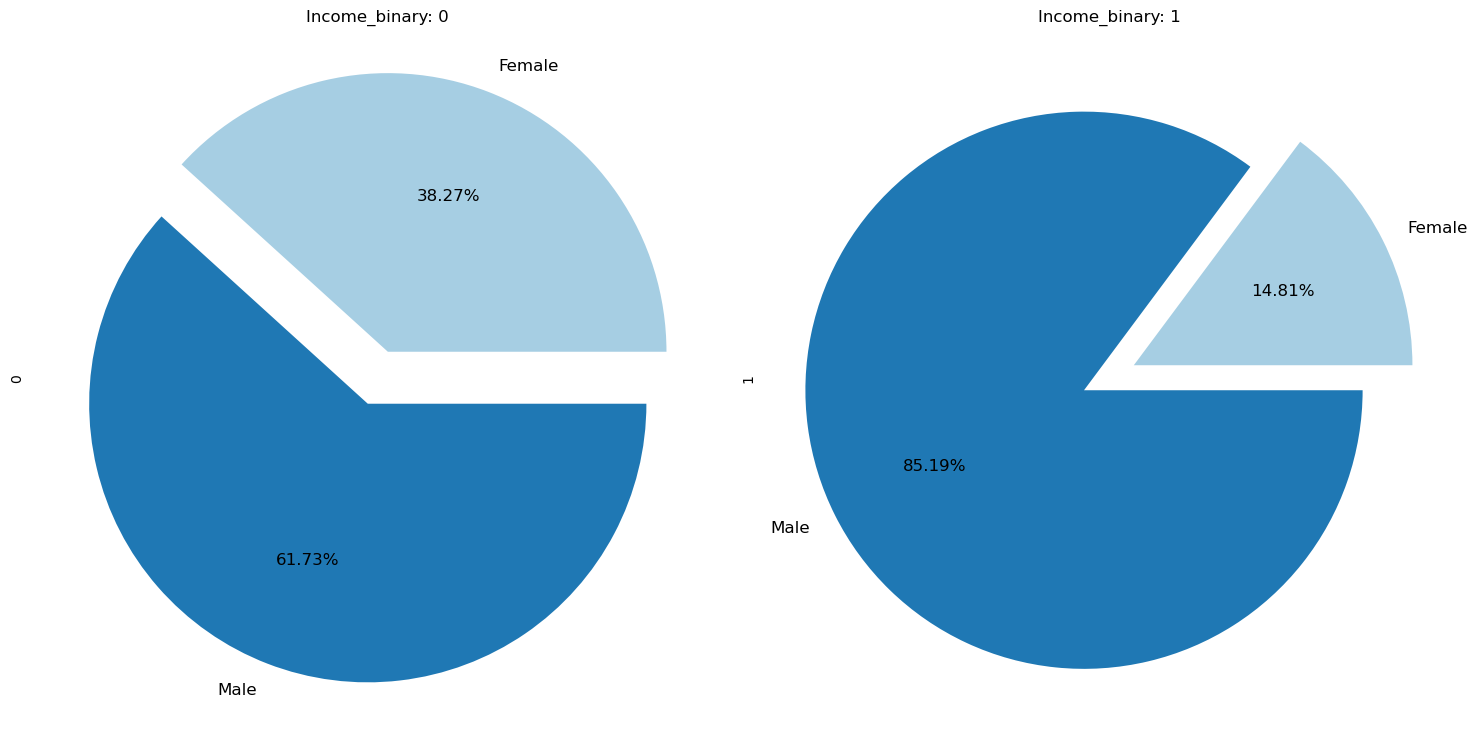

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def pie_chart_income_education(df):
    # Group the data by income_binary and education_num and count the occurrences
    income_education_counts = df.groupby(['income_binary', 'sex']).size().unstack()

    # Define the number of subplots
    num_plots = len(income_education_counts)
    
    # Create subplots
    fig, axes = plt.subplots(1, num_plots, figsize=(15, 8))

    # Ensure axes is a list even if there's only one plot
    if num_plots == 1:
        axes = [axes]
    
    # Colors for the pie chart
    colors = sns.color_palette("Paired")
    
    # Iterate over each category in income_binary
    for ax, (income, counts) in zip(axes, income_education_counts.iterrows()):
        counts.plot(
            kind='pie',
            ax=ax,
            colors=colors,
            autopct='%.2f%%',
            labels=counts.index,
            explode=[0.1] * len(counts),  # Equal explode for all slices
            fontsize=12,
            title=f"Income_binary: {income}"
        )
    
    # Display the plot
    plt.tight_layout()
    plt.show()

# Call the function
pie_chart_income_education(df)


By looking at pie chart we realize that from low Income category , 61.73% are Male and 38.27% are Female comparing to High Income category , which has 85.19% Male and only 14.8 % Female . 

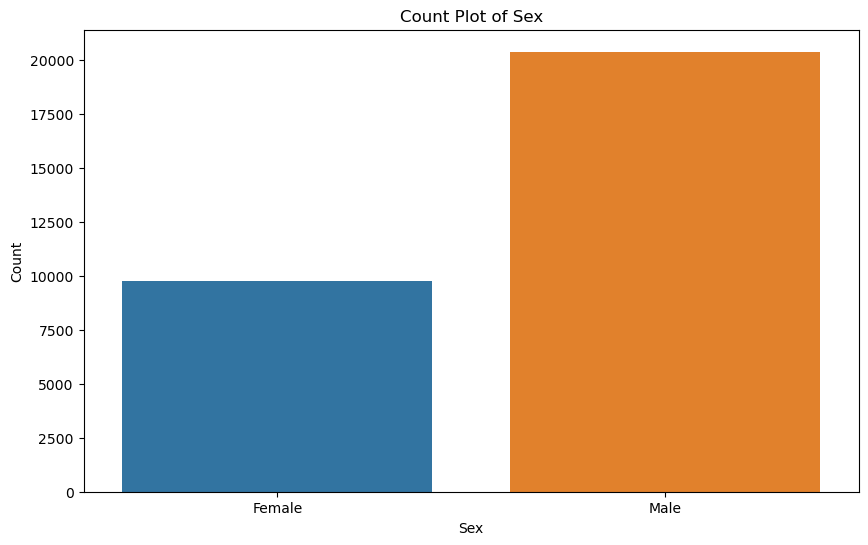

In [39]:
# Count plot of sex
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df)
plt.title('Count Plot of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Racial or ethnic groups vs Income

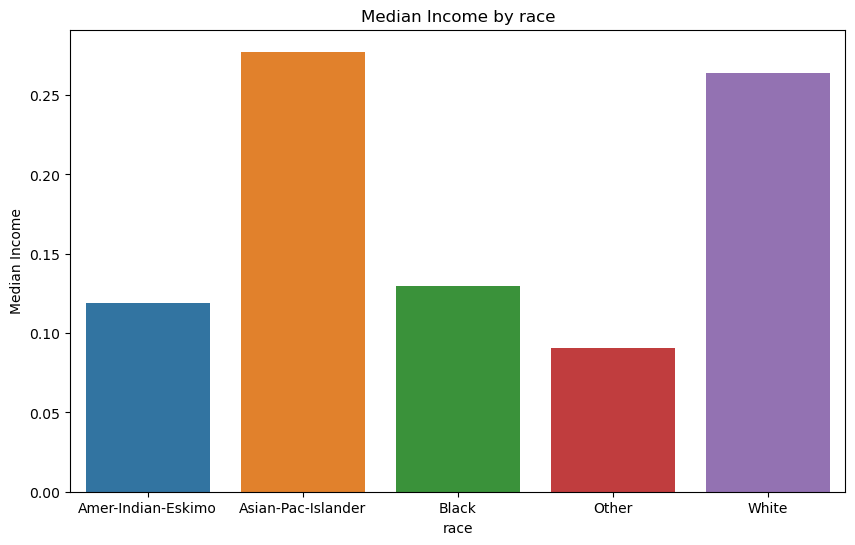

In [40]:
# Allows for the average income for different race groups
avg = df.groupby('race')['income_binary'].mean()
x = avg.index
y = avg.values
plt.figure(figsize=(10, 6))
sns.barplot(x=avg.index, y=avg.values)
plt.xlabel('race')
plt.ylabel('Median Income')
plt.title('Median Income by race')
plt.show()

As we see Asian-Pac-Islander Median income is higher that all other ethnic groups following by Whites.

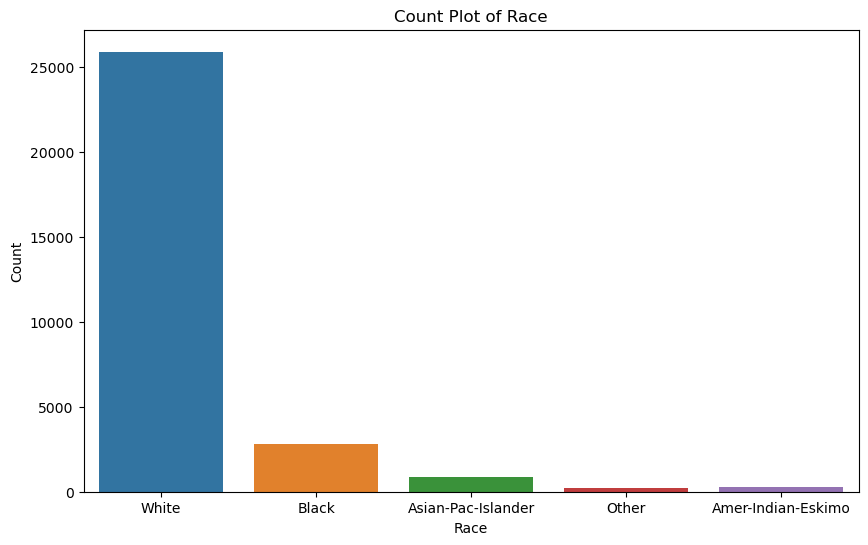

In [41]:
# Count plot of race
plt.figure(figsize=(10, 6))
sns.countplot(x='race', data=df)
plt.title('Count Plot of Race')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

# Relationship between years of education and Income

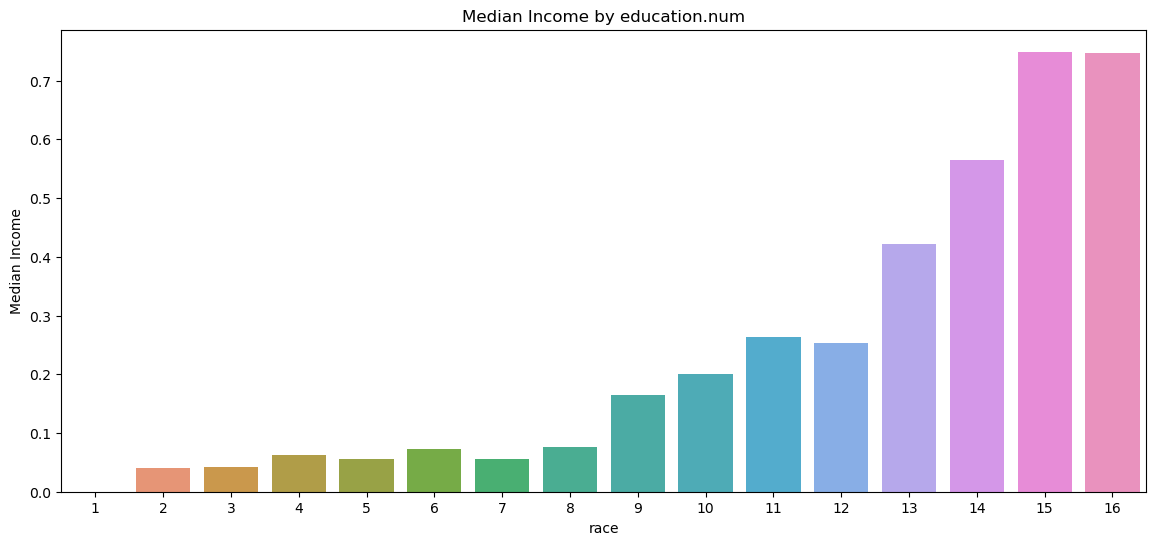

In [42]:
avg = df.groupby('education.num')['income_binary'].mean()
x = avg.index
y = avg.values
plt.figure(figsize=(14, 6))
sns.barplot(x=avg.index, y=avg.values)
plt.xlabel('race')
plt.ylabel('Median Income')
plt.title('Median Income by education.num')
plt.show()

As we see in the bar garph , the higher education years the more Median Income.

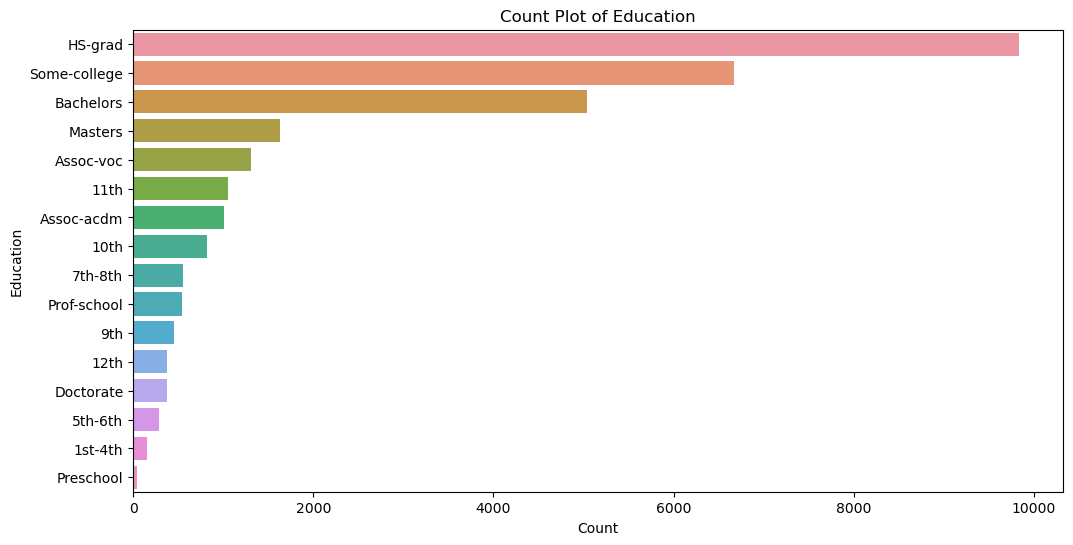

In [43]:
# Count plot of education
plt.figure(figsize=(12, 6))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title('Count Plot of Education')
plt.xlabel('Count')
plt.ylabel('Education')
plt.show()

# Occupation Vs Income

/Users/mana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


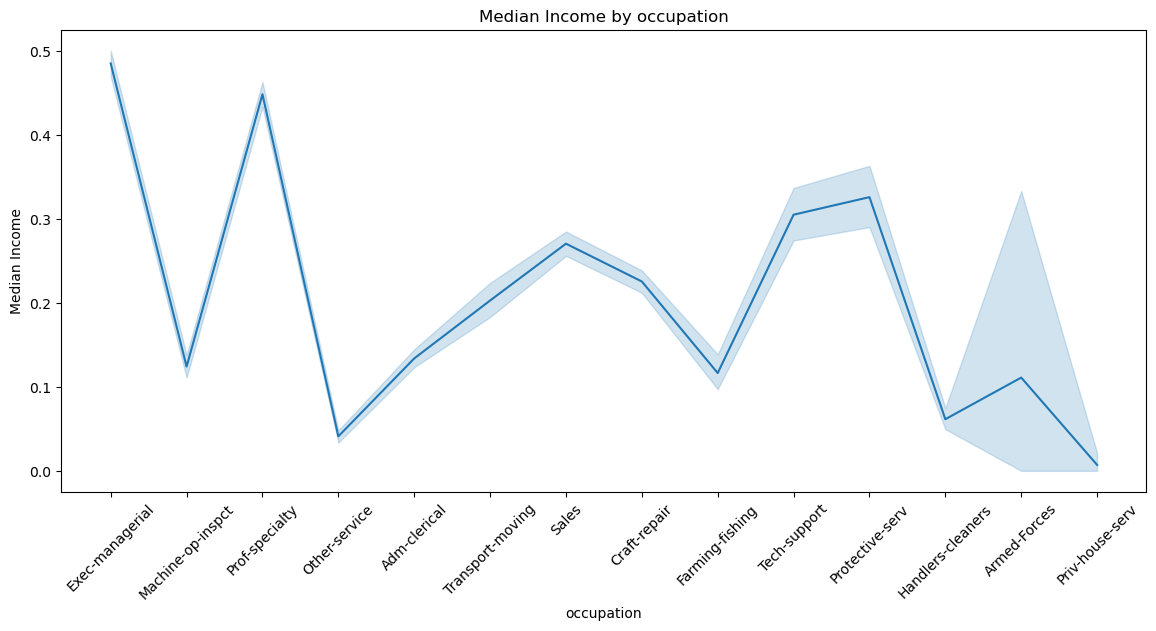

In [44]:
avg = df.groupby('occupation')['income_binary'].mean()
x = avg.index
y = avg.values
plt.figure(figsize=(14, 6))
sns.lineplot(x=df['occupation'], y=df['income_binary'])
plt.xlabel('occupation')
plt.ylabel('Median Income')

plt.xticks(rotation=45)
plt.title('Median Income by occupation')
plt.show()

As line graph shows , ceratin occupations such as Exec_managerial and Profs had the highest Income . 

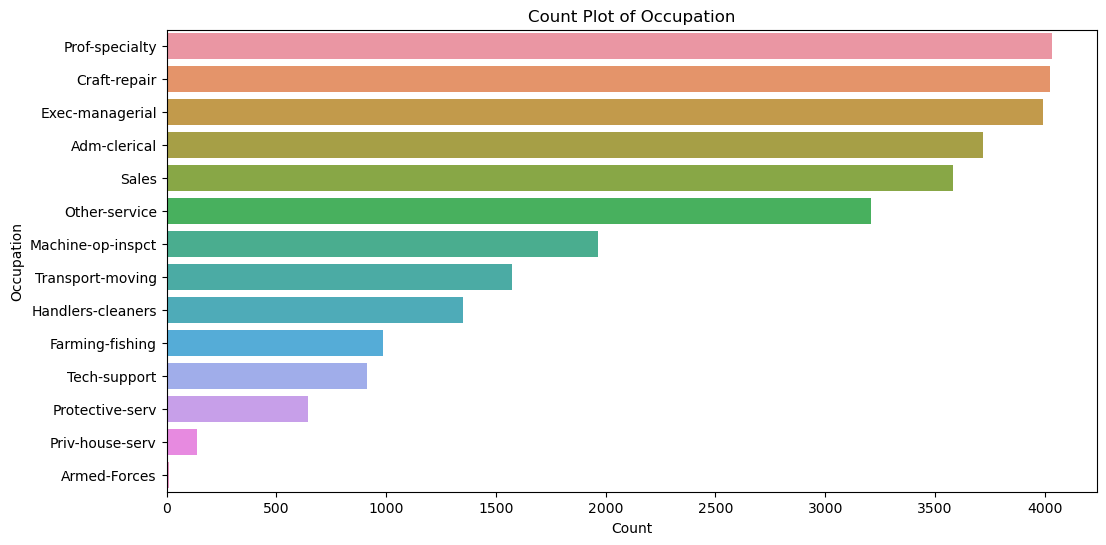

In [45]:
# Count plot of occupation
plt.figure(figsize=(12, 6))
sns.countplot(y='occupation', data=df, order=df['occupation'].value_counts().index)
plt.title('Count Plot of Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.show()

/Users/mana/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


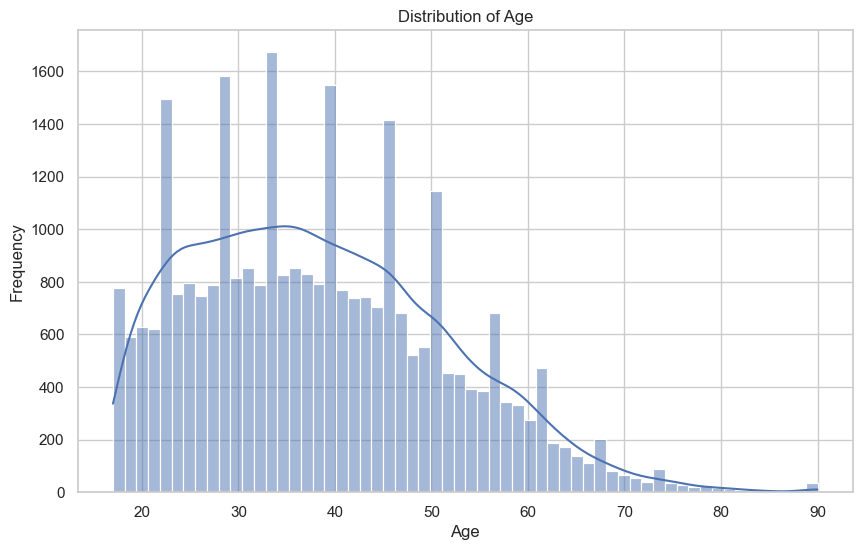

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Income Bracket 

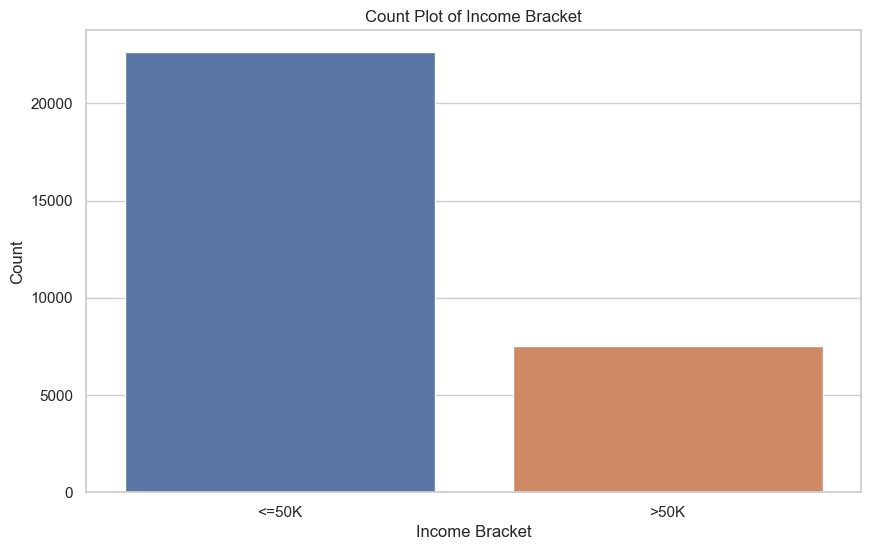

In [47]:

# Count plot of income bracket
plt.figure(figsize=(10, 6))
sns.countplot(x='income', data=df)
plt.title('Count Plot of Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Count')
plt.show()


# unbalanced data 

As its illustrated number of data with less than 50K is three times more than the data with high incomers. Therefore the income bracket is not balanced. 

# Workclass 

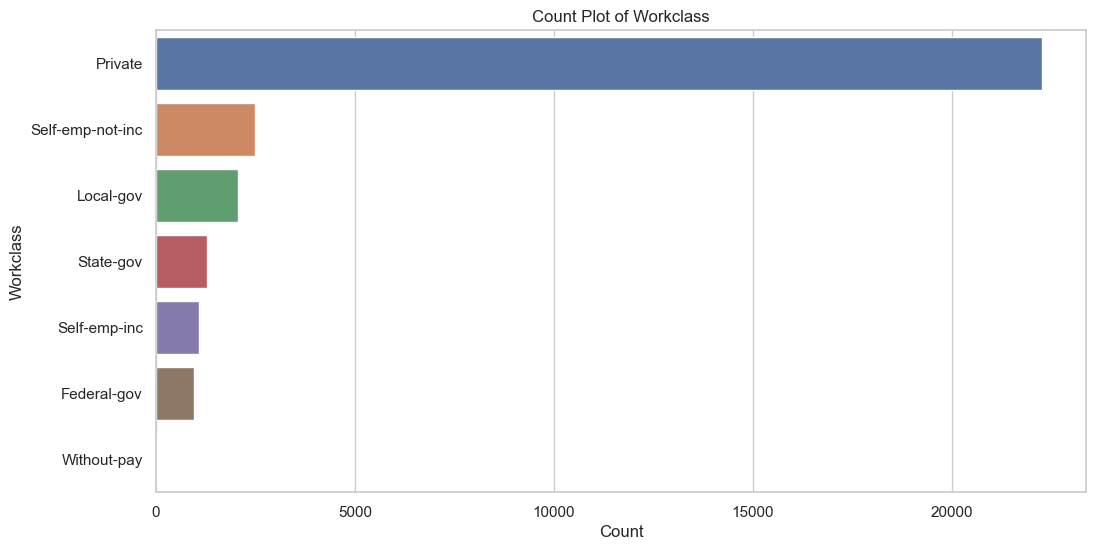

In [48]:
# Count plot of workclass
plt.figure(figsize=(12, 6))
sns.countplot(y='workclass', data=df, order=df['workclass'].value_counts().index)
plt.title('Count Plot of Workclass')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.show()

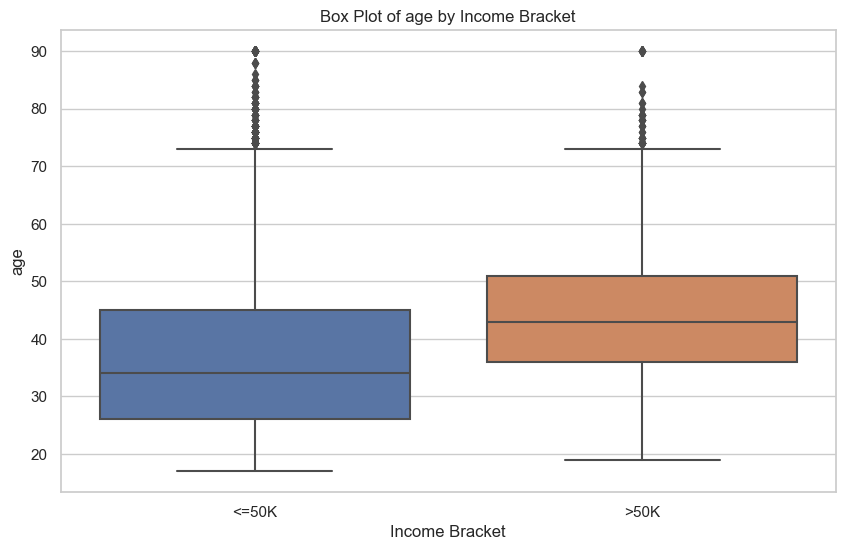

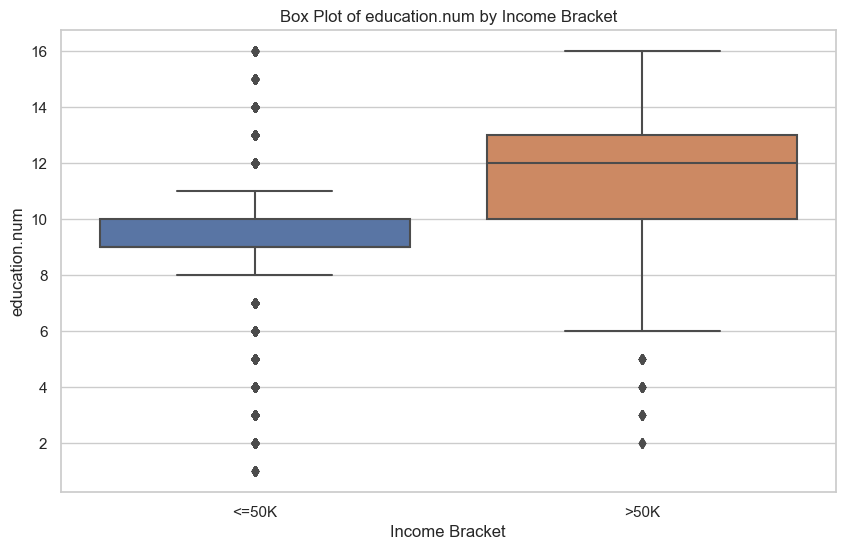

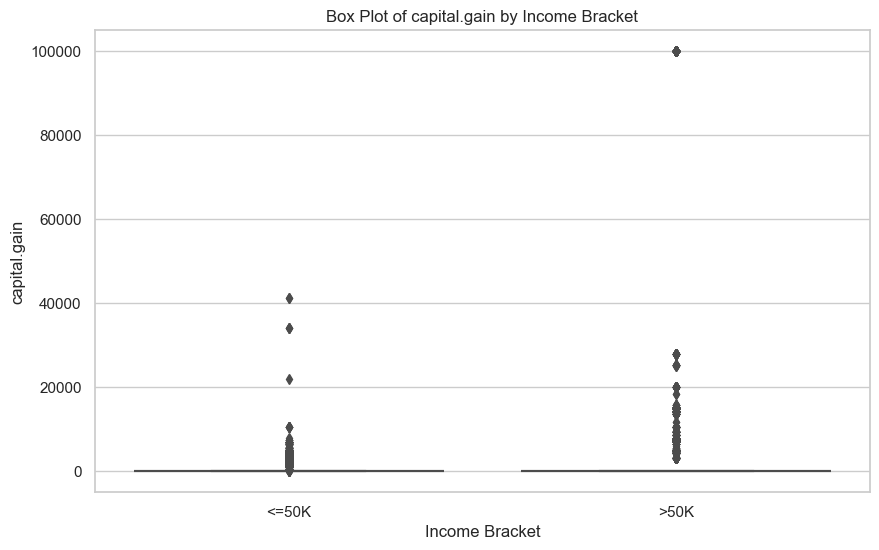

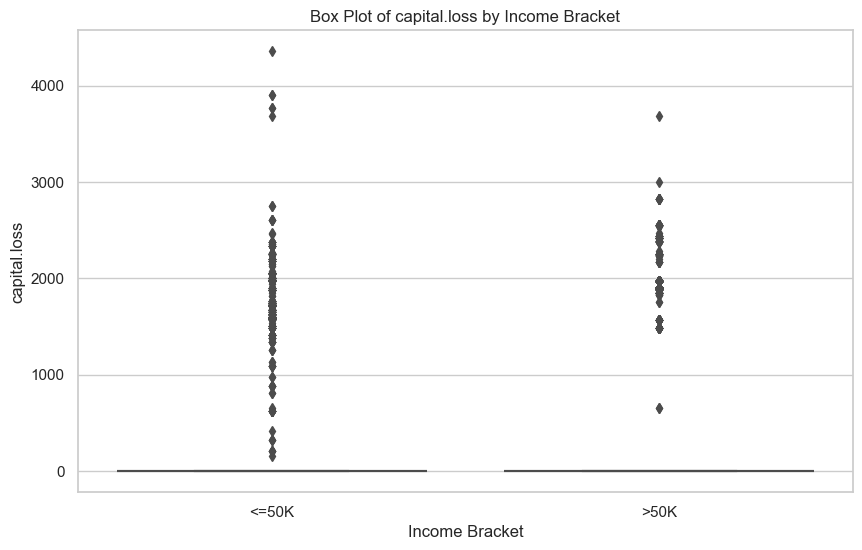

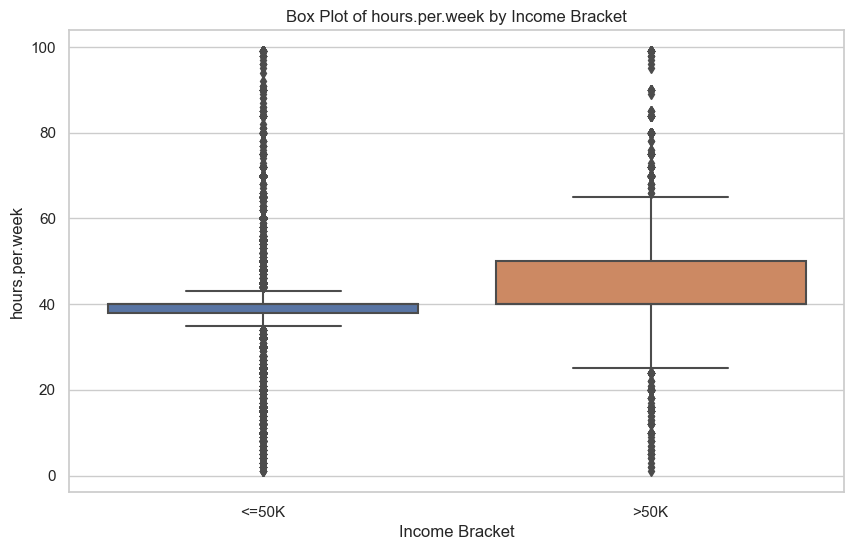

In [49]:
# Box plots for numerical features against income bracket
numerical_features = ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='income', y=feature, data=df)
    plt.title(f'Box Plot of {feature} by Income Bracket')
    plt.xlabel('Income Bracket')
    plt.ylabel(feature)
    plt.show()

# 